### In this project we get a dataset of different text messages and our goal is to develop a classification model that distinguish spam messages from normal ones.
### I will investigate two approaches of Natural Language Process (NLP) and Artificial Neural Network (ANN)

### Step 1: Importing the required libraries

In [1]:
# always start with importing 4 essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2: Reading the data

Here the data we have been provided with is not in csv format. We first need to read the file and figure out what the format is.

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
# I want to explore the data first
for mess_num, message in enumerate(messages[0:11]):
    print(mess_num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### That \t shows that the seperator is tap in the data set we have. This helps us read the data as a csv file 

In [5]:
messages = pd.read_csv('SMSSpamCollection',sep = '\t', names = ['Class','SMS'])

In [6]:
messages.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# let's see if we can find a measure to decide whether a particular message is a spam or not
# It would be a good idea to add a column of the length of the messages
messages['Length'] = messages['SMS'].map(len)

In [8]:
messages.head()

,Class,SMS,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

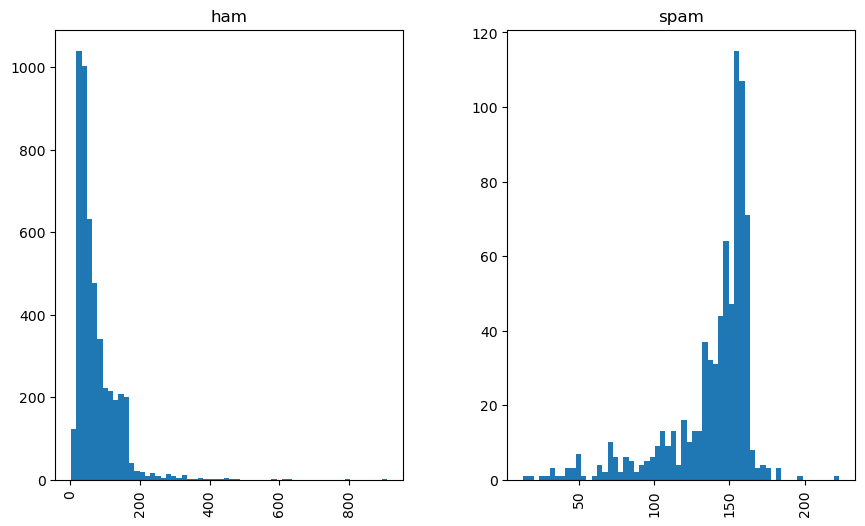

In [9]:
messages.hist(column = 'Length', by = 'Class', bins = 60, figsize=(10,6))

#### It seems that the spam messages are generally longer than normal ones. The mean for non-spam messages is about 100 characters but for the spams it is about 150.

## Modeling part
### Model 1: Natural Language Process (NLP)

#### In order to deal with the words first we need to get rid of punctuations. The 'punctuation' function allows us to take anything but characters off the messages.

In [10]:
import string

# Let's create a test message:
test_message = 'Be careful! This message says: containing punctuation.'

# Now I want to get the message without ! : and . All punctuations are in string.punctuation
nopunc = [char for char in test_message if char not in string.punctuation]
nopunc = ''.join(nopunc)

nopunc

'Be careful This message says containing punctuation'

#### The next step is removing all the stop words that do not help us find spams. Stop words are insignificant words in any languages. In English, stop words are 'a', 'the', 'is', 'and', etc.

In [11]:
# we need to import nltk in order to remove the stop words
import nltk

from nltk.corpus import stopwords

clean_message = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

clean_message

['careful', 'message', 'says', 'containing', 'punctuation']

#### Now we can use the same approach to define a function to clean the messages in our data set.

In [12]:
# Let's define a function to clean all messages
def text_cleaner(message):
    nopunc = [c for c in message if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
# We can try and see if the function works
clean_mess = messages['SMS'].head().apply(text_cleaner)
clean_mess[0]

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [14]:
# A typical NLP needs Vectorization.
# Vectorization consists of three steps:
# 1. Term Frequency : Counting every word to see how many times they occur in each message.
# 2. Inverse Document Frequency : Weigh the counts so that frequent token get lower weight.
# 3. L2 norm : Normalizing the vectors to unit length, to abstract from the original text length.
# We can still use sklearn library for countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

# We now create a bag of words (bow)

bow_transformer = CountVectorizer(analyzer = text_cleaner).fit(messages['SMS'])

#Let's check the bow_transformer

mess_test = messages['SMS'][3] # returning the 4th message
bow4 = bow_transformer.transform([mess_test])

In [15]:
print(mess_test)
print(bow4)

U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


#### Note that this results make sense. The two words of 'U' and 'say' are repeated twice and the other words only show once

In [16]:
messages_bow = bow_transformer.transform(messages['SMS'])

In [17]:
# Second and third steps of vectorization.
# Term Frequency (TF) represents the importance of the term within the document.
# Inverse Document Frequency (IDF) is the importance of the term in the corpus.

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

# I would rather try the tfidf_transformer I have just created before applying it to the whole data set.

tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


#### Now for each word after the cleaning, tfidf_transformer assigns a weight according to the importance of the word

In [18]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [19]:
# I usually use the Naive Bayes method for NLP approach assuming that all features are independent

from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['Class'])

prediction = spam_detect_model.predict(messages_tfidf)

#### This model works but the whole dataset was used for training. I still want to have an opportunity to test the model. One way is to make a pipeline and then split the data into train and test set.

In [20]:
from sklearn.model_selection import train_test_split

SMS_train, SMS_test, Class_train, Class_test = train_test_split(messages['SMS'], messages['Class'], test_size=0.3, random_state=101)

In [21]:
# Making pipelines

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                    ('bow',CountVectorizer(analyzer=text_cleaner)),
                    ('tfidf',TfidfTransformer()),
                    ('Classifier',MultinomialNB())
                    ])

pipeline.fit(SMS_train,Class_train)

prediction_1 = pipeline.predict(SMS_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(prediction_1,Class_test))
print(confusion_matrix(Class_test,prediction_1))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1543
        spam       0.65      1.00      0.79       129

    accuracy                           0.96      1672
   macro avg       0.83      0.98      0.88      1672
weighted avg       0.97      0.96      0.96      1672

[[1475    0]
 [  68  129]]


### It looks like the Naive Bayes assumption did pretty well in NLP approach.

### Model 2: Artificial Neural Network (ANN)

#### For solving the problem with Neural Networks, we need to apply TFIDF to all the messages first and then convert them to numpy array. This step is required for train-test splitting. 

In [23]:
bows = CountVectorizer(analyzer=text_cleaner).fit_transform(messages['SMS'])
TFIDF = TfidfTransformer().fit_transform(bows)

# Now I convert this TFIDF to numpy array
tfidf_array = TFIDF.toarray()

#### This time the classification is unstructured but we still need to make decisions between 'Spam' or 'Ham'. Therefore, the classes must be encoded first and the test data should be categorized.

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Classes = LE.fit_transform(messages['Class'])

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
classes = to_categorical(Classes,2)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_array, classes, test_size=0.1, random_state=101)

In [31]:
print('TFIDF matrix size shape = ', tfidf_array.shape )
print('One-hot encoding shape = ',classes.shape)

TFIDF matrix size shape =  (5572, 11425)
One-hot encoding shape =  (5572, 2)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ANN = Sequential()

ANN.add(Dense(32, input_shape = (X_train.shape[1],),activation = 'relu' ))
ANN.add(Dense(32, activation = 'relu'))
ANN.add(Dense(2,activation = 'softmax'))

ANN.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

ANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                365632    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 366,754
Trainable params: 366,754
Non-trainable params: 0
_________________________________________________________________


In [54]:
ANN.fit(X_train,y_train,validation_split = 0.2, epochs = 30, batch_size = 256)

Epoch 1/30
16/16 [==============================] - 1s 29ms/step - loss: 2.7283e-04 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9791
Epoch 2/30
16/16 [==============================] - 0s 24ms/step - loss: 2.4892e-04 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9791
Epoch 3/30
16/16 [==============================] - 0s 23ms/step - loss: 2.2940e-04 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9801
Epoch 4/30
16/16 [==============================] - 0s 22ms/step - loss: 2.1446e-04 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9791
Epoch 5/30
16/16 [==============================] - 0s 18ms/step - loss: 1.9793e-04 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9791
Epoch 6/30
16/16 [==============================] - 0s 20ms/step - loss: 1.8512e-04 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9791
Epoch 7/30
16/16 [==============================] - 0s 21ms/step - loss: 1.7302e-04 - accuracy: 1.0000 - val_loss: 0.1114 - val_ac


Evaluation against Test Dataset :
------------------------------------
18/18 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9785


[0.050130389630794525, 0.9784946441650391]

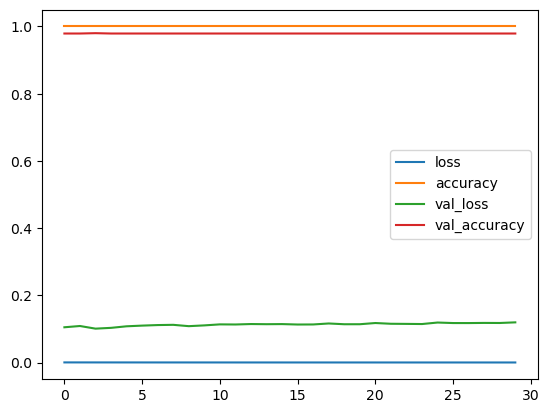

In [55]:
losses = pd.DataFrame(ANN.history.history)
losses.plot()
print("\nEvaluation against Test Dataset :\n------------------------------------")
ANN.evaluate(X_test,y_test)

In [56]:
prediction = ANN.predict(X_test)

18/18 [==============================] - 0s 3ms/step


In [57]:
X_test.shape

(558, 11425)

#### The Neural Network worked good. Now we need to test the model on some unseen data.

In [45]:
# Let's test the model for a list of two messages. One spam and one ham

test_list = ['Free Pizza in trivial night',"I'll be there in a lil"]

test_bow = CountVectorizer(analyzer=text_cleaner).fit_transform(test_list)
test_tfidf = TfidfTransformer().fit_transform(test_bow).toarray()

#Predict using model
prediction = np.argmax( ANN.predict(test_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", LE.inverse_transform(prediction))

ValueError: in user code:

    File "C:\Users\poory\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\poory\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\poory\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\poory\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\poory\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\poory\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 11425), found shape=(None, 6)


In [51]:
print(X_train)
X_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(5014, 11425)

In [52]:
test_tfidf

array([[0.5       , 0.        , 0.5       , 0.        , 0.5       ,
        0.5       ],
       [0.        , 0.70710678, 0.        , 0.70710678, 0.        ,
        0.        ]])